In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition

In [8]:
inputfile = '../data/test/mexico_k_1_layers_5.csv'
profile_file = '../data/profiles.csv'

def get_data():
    profiles_file = pd.read_csv(profile_file)
    profiles_file = profiles_file[['profile_id', 'cwrb_reference_soil_group']]
    data = pd.read_csv(inputfile)
    data = profiles_file.merge(data, how="inner", left_on=[
        'profile_id'], right_on=['profile_id'])

    data = remove_small_classes(data, 15)
    
    data = remove_outliers(data)


    y = data.cwrb_reference_soil_group.astype(str)
    X = data.drop(['cwrb_reference_soil_group'], axis=1)

    return X, y

def remove_small_classes(df, min):
    uniques = df.cwrb_reference_soil_group.unique()
    for u in uniques:
        cnt = df[df.cwrb_reference_soil_group == u].shape[0]
        if cnt < min:
            df = df[df.cwrb_reference_soil_group != u]
            print('Deleting {} with {} occurrences'.format(u, cnt))

    return df


def remove_outliers(data):
    print("Removing outliers")
    data = data[data.lower_depth_4 < 15]
    return data


Deleting Plinthosols with 6 occurrences
Deleting Histosols with 10 occurrences
Removing outliers


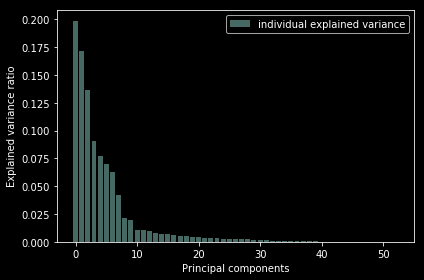

In [49]:
X, y = get_data()
pca = decomposition.PCA()

pca.fit(X.drop('profile_id', axis=1))
X = pca.transform(X.drop('profile_id', axis=1))
pca.explained_variance_ratio_

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Deleting Plinthosols with 6 occurrences
Deleting Histosols with 10 occurrences
Removing outliers


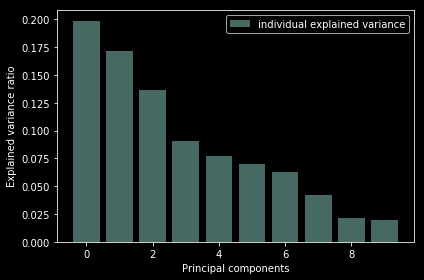

In [50]:
X, y = get_data()
pca = decomposition.PCA(n_components=10)

pca.fit(X.drop('profile_id', axis=1))
X = pca.transform(X.drop('profile_id', axis=1))
pca.explained_variance_ratio_

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()